<div style="background: gold; color: blue; padding: 10px"><h1>Clustering 492 Indian Cities (Data Science Project)</h1>
    <span style="color: red; width: 100%">by <b>Santanu Sikder</b></span></div>

# Intro

In this project, I'm going to cluster 492 prominent Indian cities into 4 clusters on the basis of several statistics and location data extracted from Foursquare API.

<h3><b><u>Note</u></b>: The maps labelled as Map-1 and Map-2 have been provided in the repository as PNG images, because they won't be directly visible from this notebook on GitHub.</h3>

# Data Gathering and Cleaning

<hr style="height: 10px"/>

In [1]:
# Let's import some important initial modules first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# # Uncomment this code cell to quickly get the cleaned dataframe containing the major venue categorical information and skip all the cleaning below
# df = pd.read_csv("complete-major-categories-venue-data-492-indian-cities-within-20km.csv", index_col = "name_of_city")
# # Preview
# df.head(10)

<hr style="height: 10px"/>

In [3]:
# Read the CSV file into a pandas dataframe
df = pd.read_csv("492-indian-cities-dataset.csv")
# The names of the cities have unwanted spaces at the end, so they need to be removed
df["name_of_city"] = df["name_of_city"].str.rstrip()
# Preview the df
df.head(10)

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
5,Agartala,16,TRIPURA,1,399688,199616,200072,33635,17341,16294,...,169109,1002,940,93.88,95.75,92.02,"23.831457,91.2867777",52711,30215,22496
6,Agra,9,UTTAR PRADESH,15,1574542,849771,724771,186516,105279,81237,...,376725,853,772,63.44,67.67,58.54,"27.1766701,78.0080745",185813,106082,79731
7,Ahmadabad,24,GUJARAT,7,5570585,2935869,2634716,589076,317917,271159,...,2004480,897,853,89.62,93.96,84.81,"23.022505,72.5713621",769858,435267,334591
8,Ahmadnagar,27,MAHARASHTRA,26,350905,179755,171150,36712,19748,16964,...,134649,952,859,91.49,95.51,87.33,"19.0952075,74.7495916",51661,29832,21829
9,Aizawl,15,MIZORAM,3,291822,143803,148019,35147,17667,17480,...,128332,1029,989,98.80,99.30,98.31,"23.727107,92.7176389",26832,14900,11932


In [4]:
# Check the available columns and their dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    492 non-null    object 
 1   state_code                      492 non-null    int64  
 2   state_name                      492 non-null    object 
 3   dist_code                       492 non-null    int64  
 4   population_total                492 non-null    int64  
 5   population_male                 492 non-null    int64  
 6   population_female               492 non-null    int64  
 7   0-6_population_total            492 non-null    int64  
 8   0-6_population_male             492 non-null    int64  
 9   0-6_population_female           492 non-null    int64  
 10  literates_total                 492 non-null    int64  
 11  literates_male                  492 non-null    int64  
 12  literates_female                492 

In [5]:
# Incorporate the male-female columns related to education into single columns of the respective female-male ratios
df["literacy_ratio"] = df["literates_female"] / df["literates_male"]
df["literacy_rate_ratio"] = df["effective_literacy_rate_female"] / df["effective_literacy_rate_male"]
df["graduates_ratio"] = df["female_graduates"] / df["male_graduates"]
# And drop the above male-female columns
df.drop(["literates_female", "literates_male", "effective_literacy_rate_female", "effective_literacy_rate_male", "female_graduates", "male_graduates"], axis = 1, inplace = True)
# Preview the modified df
df.head(10)

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,sex_ratio,child_sex_ratio,effective_literacy_rate_total,location,total_graduates,literacy_ratio,literacy_rate_ratio,graduates_ratio
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,103319,890,848,79.86,"30.1452928,74.1993043",16287,0.770768,0.860802,0.891198
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,92433,928,909,91.99,"21.257584,77.5086754",8863,0.873123,0.939116,0.682103
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,83955,982,947,80.51,"19.0809075,79.560344",10565,0.813479,0.824790,0.554362
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,125985,902,910,83.46,"22.7834741,86.1576889",19225,0.762768,0.847188,0.577242
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,101292,1013,968,68.38,"15.6322227,77.2728368",11902,0.802253,0.787804,0.512133
5,Agartala,16,TRIPURA,1,399688,199616,200072,33635,17341,16294,343633,1002,940,93.88,"23.831457,91.2867777",52711,0.968973,0.961044,0.744531
6,Agra,9,UTTAR PRADESH,15,1574542,849771,724771,186516,105279,81237,880530,853,772,63.44,"27.1766701,78.0080745",185813,0.747760,0.865081,0.751598
7,Ahmadabad,24,GUJARAT,7,5570585,2935869,2634716,589076,317917,271159,4464303,897,853,89.62,"23.022505,72.5713621",769858,0.814888,0.902618,0.768703
8,Ahmadnagar,27,MAHARASHTRA,26,350905,179755,171150,36712,19748,16964,287468,952,859,91.49,"19.0952075,74.7495916",51661,0.881101,0.914355,0.731731
9,Aizawl,15,MIZORAM,3,291822,143803,148019,35147,17667,17480,253588,1029,989,98.80,"23.727107,92.7176389",26832,1.024558,0.990030,0.800805


In [6]:
# Drop other unnecessary columns including population male-female, 0-6 years old population male-female and district code
df.drop(["population_male", "population_female", "0-6_population_male", "0-6_population_female", "dist_code"], axis = 1, inplace = True)
# Preview
df.head()

,name_of_city,state_code,state_name,population_total,0-6_population_total,literates_total,sex_ratio,child_sex_ratio,effective_literacy_rate_total,location,total_graduates,literacy_ratio,literacy_rate_ratio,graduates_ratio
0,Abohar,3,PUNJAB,145238,15870,103319,890,848,79.86,"30.1452928,74.1993043",16287,0.770768,0.860802,0.891198
1,Achalpur,27,MAHARASHTRA,112293,11810,92433,928,909,91.99,"21.257584,77.5086754",8863,0.873123,0.939116,0.682103
2,Adilabad,28,ANDHRA PRADESH,117388,13103,83955,982,947,80.51,"19.0809075,79.560344",10565,0.813479,0.824790,0.554362
3,Adityapur,20,JHARKHAND,173988,23042,125985,902,910,83.46,"22.7834741,86.1576889",19225,0.762768,0.847188,0.577242
4,Adoni,28,ANDHRA PRADESH,166537,18406,101292,1013,968,68.38,"15.6322227,77.2728368",11902,0.802253,0.787804,0.512133


In [7]:
# Convert the state names to title case
df["state_name"] = df["state_name"].str.title()
# Split location into latitudes and longitudes
latLong = np.array(list(df["location"].str.split(',')), dtype = np.float64)
df["lat"] = latLong[:, 0]
df["long"] = latLong[:, 1]
# Drop the location column
df.drop("location", axis = 1, inplace = True)
# Preview
df.head()

,name_of_city,state_code,state_name,population_total,0-6_population_total,literates_total,sex_ratio,child_sex_ratio,effective_literacy_rate_total,total_graduates,literacy_ratio,literacy_rate_ratio,graduates_ratio,lat,long
0,Abohar,3,Punjab,145238,15870,103319,890,848,79.86,16287,0.770768,0.860802,0.891198,30.145293,74.199304
1,Achalpur,27,Maharashtra,112293,11810,92433,928,909,91.99,8863,0.873123,0.939116,0.682103,21.257584,77.508675
2,Adilabad,28,Andhra Pradesh,117388,13103,83955,982,947,80.51,10565,0.813479,0.824790,0.554362,19.080907,79.560344
3,Adityapur,20,Jharkhand,173988,23042,125985,902,910,83.46,19225,0.762768,0.847188,0.577242,22.783474,86.157689
4,Adoni,28,Andhra Pradesh,166537,18406,101292,1013,968,68.38,11902,0.802253,0.787804,0.512133,15.632223,77.272837


In [8]:
# Convert the newly created ratio columns to the "per-thousand" form
df[["literacy_ratio", "literacy_rate_ratio", "graduates_ratio"]] = (df[["literacy_ratio", "literacy_rate_ratio", "graduates_ratio"]] * 1000).astype("int64")
# Use name_of_city as the index
df.set_index("name_of_city", inplace = True)
# Preview
df.head()

,state_code,state_name,population_total,0-6_population_total,literates_total,sex_ratio,child_sex_ratio,effective_literacy_rate_total,total_graduates,literacy_ratio,literacy_rate_ratio,graduates_ratio,lat,long
name_of_city,,,,,,,,,,,,,,
Abohar,3,Punjab,145238,15870,103319,890,848,79.86,16287,770,860,891,30.145293,74.199304
Achalpur,27,Maharashtra,112293,11810,92433,928,909,91.99,8863,873,939,682,21.257584,77.508675
Adilabad,28,Andhra Pradesh,117388,13103,83955,982,947,80.51,10565,813,824,554,19.080907,79.560344
Adityapur,20,Jharkhand,173988,23042,125985,902,910,83.46,19225,762,847,577,22.783474,86.157689
Adoni,28,Andhra Pradesh,166537,18406,101292,1013,968,68.38,11902,802,787,512,15.632223,77.272837


In [9]:
# Save the dataframe into a new CSV file
df.to_csv("cleaned-492-indian-cities-dataset.csv")
# Review the columns again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, Abohar to Yavatmal
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state_code                     492 non-null    int64  
 1   state_name                     492 non-null    object 
 2   population_total               492 non-null    int64  
 3   0-6_population_total           492 non-null    int64  
 4   literates_total                492 non-null    int64  
 5   sex_ratio                      492 non-null    int64  
 6   child_sex_ratio                492 non-null    int64  
 7   effective_literacy_rate_total  492 non-null    float64
 8   total_graduates                492 non-null    int64  
 9   literacy_ratio                 492 non-null    int64  
 10  literacy_rate_ratio            492 non-null    int64  
 11  graduates_ratio                492 non-null    int64  
 12  lat                            492 non-null  

In [10]:
# Import folium and draw the first (basic) map of this project
import folium
india = folium.Map(location = [20.5937, 78.9629], zoom_start = 4.4)
# Insert the circle markers for the cities
for city, state, lat, long in zip(df.index, df["state_name"], df["lat"], df["long"]):
    folium.CircleMarker(
        [lat, long],
        radius = 2,
        color = "red",
        opacity = 0.5,
        fill = True,
        fill_color = "red",
        popup = "<h3>" + city + "</h3><div style=\"color: red\">" + state + "</div>",
        icon = folium.Icon(color = "red")
    ).add_to(india)
india

<blockquote style="background: skyblue; color: yellow; font-size: 2rem;">
    Map <b>( 1 )</b>
</blockquote>

### Collecting Location (Venues) Data from Foursquare

In [11]:
# Import web accessing and json manipulating libraries
import requests, json

<h5>The credentials shown below are fake, so that the actual ones can be prevented from bein stolen and misused; but while doing this project, the real ones have been used</h5>

In [12]:
# Define the credentials
CLIENT_ID = "the-client-id-has-been-hidden"
CLIENT_SECRET = "the-client-secret-has-been-hidden"
VERSION = "20200916"

In [13]:
# Define the search parameters
radius = 20000  # 20 kms
limit = 100

I'll generate a file containing the venue details of each city (which will be a dictionary with the city names as the indices)

<hr style="height: 10px"/>

In [14]:
# Initiate the dictionary which will contain the venue details
venueData = dict()
# Open/create the file named "venue-data.json" in write + read mode
venueDataFile = open("venue-data-492-indian-cities-within-20km.json", 'w')
# Get and store the venue data into the dictionary for each venue in the existing df
for city, lat, long in zip(df.index, df["lat"], df["long"]):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius,
        limit
    )
    # Get the results
    results = requests.get(url).json()
    # Get the relevant part of the results dict
#     venues = results["response"]["groups"][0]["items"]
    # Assign the venues dict to the key corresponding to the particular key
    venueData[city] = results
    
# Push the dict into the JSON file
venueDataFile.write(json.dumps(venueData))
# Close the file
venueDataFile.close()

<hr style="height: 10px"/>

In [15]:
# In case I don't want to repeat the above cell again and again but still be able to use the venueData dict
with open("venue-data-492-indian-cities-within-20km.json") as fl:
    venueData = json.loads(fl.read())

Now that I have extracted the venue data of the various cities into a JSON file as well as a dictionary, I'll use it to collect the various categorical information of the venues into my dataframe.

First of all, I'll extract the names of all the unique venue categories

In [16]:
# Initiate a dictionary that will include the number of venues of the specific category for each city
categories = pd.DataFrame(index = df.index)
# Preview
categories.head()

""
name_of_city
Abohar
Achalpur
Adilabad
Adityapur
Adoni


In [17]:
# Start the for loop for traversing through the results for different cities
for city, results in venueData.items():
    # Get the list of available items (venues) returned as the current results dict
    itemList = results["response"]["groups"][0]["items"]
    # If there is no information available for the trending venues of the current city, skip to next
    if(itemList == []):
        categories.append(pd.DataFrame({}, index = [city]))
    # Otherwise add a row to the df corresponding to the current city and category
    else:
        for item in itemList:
            catname = item["venue"]["categories"][0]["name"]
            # An error kept occurring regarding the total number of values added per city for about 1.5 days
            # But I kept on researching on my codes, dfs and cells to understand it and I finally realised that it was a stupid mistake to add NaN values as well below (NaN + any number = NaN)
            # So I decided to replace all NaN's with 0's in every new column created
            categories.loc[city, catname] = categories.loc[city].get(catname, 0) + 1
            categories[catname].replace(np.nan, 0, inplace = True)
                
# Preview the categories df
categories.head()

,Pizza Place,Train Station,ATM,Bar,Bus Station,Vegetarian / Vegan Restaurant,Mobile Phone Shop,Diner,Park,Bakery,...,Ski Area,Badminton Court,Dairy Store,Frozen Yogurt Shop,Planetarium,Roof Deck,Rajasthani Restaurant,Fabric Shop,Science Museum,Sake Bar
name_of_city,,,,,,,,,,,,,,,,,,,,,
Abohar,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Achalpur,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adilabad,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adityapur,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adoni,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# change the dtypes to int64
categories = categories.astype("int64")
# Preview
categories.head()

,Pizza Place,Train Station,ATM,Bar,Bus Station,Vegetarian / Vegan Restaurant,Mobile Phone Shop,Diner,Park,Bakery,...,Ski Area,Badminton Court,Dairy Store,Frozen Yogurt Shop,Planetarium,Roof Deck,Rajasthani Restaurant,Fabric Shop,Science Museum,Sake Bar
name_of_city,,,,,,,,,,,,,,,,,,,,,
Abohar,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Achalpur,0,0,1,1,1,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Adilabad,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adityapur,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Adoni,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
categories.index

Index(['Abohar', 'Achalpur', 'Adilabad', 'Adityapur', 'Adoni', 'Agartala',
       'Agra', 'Ahmadabad', 'Ahmadnagar', 'Aizawl',
       ...
       'Vellore', 'Veraval', 'Vidisha', 'Vijayawada', 'Visakhapatnam',
       'Vizianagaram', 'Warangal', 'Wardha', 'Yamunanagar', 'Yavatmal'],
      dtype='object', name='name_of_city', length=492)

In [20]:
# Let's have a look at all the available categories
categories.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, Abohar to Yavatmal
Data columns (total 295 columns):
 #   Column                                    Dtype
---  ------                                    -----
 0   Pizza Place                               int64
 1   Train Station                             int64
 2   ATM                                       int64
 3   Bar                                       int64
 4   Bus Station                               int64
 5   Vegetarian / Vegan Restaurant             int64
 6   Mobile Phone Shop                         int64
 7   Diner                                     int64
 8   Park                                      int64
 9   Bakery                                    int64
 10  Italian Restaurant                        int64
 11  Hotel                                     int64
 12  Café                                      int64
 13  Multiplex                                 int64
 14  Indian Restaurant                   

In [21]:
# Convert the above list into a dataframe for easier manipulation
dfCats = pd.DataFrame(categories.columns).rename({0: "Categories"}, axis = 1)
# Preview
dfCats.head()

,Categories
0,Pizza Place
1,Train Station
2,ATM
3,Bar
4,Bus Station


I'm going to further categorise these 182 categories into 5 major categories, namely:
<ul>
    <li>Food/Lodging/Luxury</li>
    <li>Shops/Market/Services</li>
    <li>Recreational/Sports</li>
    <li>Nature/Historic</li>
    <li>Public/Transport</li>
</ul>
<br/>
So I'm going to create a dictionary which will have these major categories as the keys and a list of the keywords corresponding to each category to search  for among the names of the columns.
<br/>
<b>Note</b>: This thing required me to do a li'l bit of research manually and consumed a very good amount of time.

In [22]:
# Dictionary of the keywords
keywordsDict = {
    "Food/Lodging/Luxury": ["Restaurant", "Hotel", "Motel", "Pizza", "Bar", "Tea", "Breakfast", "Chicken", "Café", "Burger", "Bakery", "Dhaba", "Hostel", "Resort", "Snack", "Lounge", "Deli", "Pub", "Bistro", "Food", "Nightclub", "Boarding", "Diner", "Chaat", "Place", "BBQ", "Donut", "Steakhouse", "Creperie", "Irani", "Place", "Palace", "Speakeasy", "Gastropub", "Wings", "Club", "Rest", "Cafeteria", "Buffet", "Nightlife"],
    "Shops/Market/Services": ["Service", "Services", "Store", "Shop", "Center", "Pharmacy", "Currency", "Bookstore", "Market", "Rental", "Mall", "Boutique", "Brewery", "Spa", "Multiplex", "Shopping", "Gym", "Fitness", "Plaza", "Garage", "Space", "Factory", "Construction", "Booth", "Office", "Residential", "Grocery", "Salon", "Travel", "Astrologer", "Building", "Cleaner", "Supermarket"],
    "Recreational/Sports/Art": ["Bowling", "Movie", "Theater", "Art", "Arts", "Stadium", "Hall", "Sports", "Recreation", "Lookout", "Campground", "Pool", "Playground", "Studio", "Planetarium", "Target", "Music", "Golf", "Tennis", "Cricket", "Entertainment", "Gaming", "Racetrack", "Arcade", "Sculpture", "Basketball", "Fishing", "Badminton", "Outdoors", "Soccer", "Surf", "Ski", "Track"],
    "Nature/Historic/Tourism": ["Park", "Monument", "Landmark", "Lake", "Museum", "Garden", "Historic", "Mountain", "Zoo", "River", "Beach", "Lighthouse", "Spring", "Farm", "Cave", "Castle", "Field", "Forest", "Tree", "Nature", "Cable", "Vineyard", "Exhibit", "Island", "Roof", "Amphitheater", "Pier"],
    "Public/Transport": ["ATM", "Station", "Government", "Border", "Bank", "Platform", "Boat", "Trail", "Airport", "Neighborhood", "Intersection", "Heliport", "Hospital", "City", "Taxi", "Harbor", "Bus", "College", "Town", "Road", "University", "Temple", "Shrine"]
}

In [23]:
# Total number of keywords
sum([len(l) for l in keywordsDict.values()])

156

In [24]:
# Dictionary of the categories part of the major categories
categoriesDict = {
    "Food/Lodging/Luxury": [],
    "Shops/Market/Services": [],
    "Recreational/Sports/Art": [],
    "Nature/Historic/Tourism": [],
    "Public/Transport": []
}

In [25]:
# Append the category names to the corresponding major categories based on the keywords
for cat in dfCats["Categories"]:
    words = cat.split(' ')
    if(any([(word in keywordsDict["Food/Lodging/Luxury"]) for word in words])):
        categoriesDict["Food/Lodging/Luxury"].append(cat)
    elif(any([(word in keywordsDict["Shops/Market/Services"]) for word in words])):
        categoriesDict["Shops/Market/Services"].append(cat)
    elif(any([(word in keywordsDict["Recreational/Sports/Art"]) for word in words])):
        categoriesDict["Recreational/Sports/Art"].append(cat)
    elif(any([(word in keywordsDict["Nature/Historic/Tourism"]) for word in words])):
        categoriesDict["Nature/Historic/Tourism"].append(cat)
    elif(any([(word in keywordsDict["Public/Transport"]) for word in words])):
        categoriesDict["Public/Transport"].append(cat)

In [26]:
# View the dict
categoriesDict

{'Food/Lodging/Luxury': ['Pizza Place',
  'Bar',
  'Vegetarian / Vegan Restaurant',
  'Diner',
  'Bakery',
  'Italian Restaurant',
  'Hotel',
  'Café',
  'Indian Restaurant',
  'Sandwich Place',
  'Salad Place',
  'Fried Chicken Joint',
  'Multicuisine Indian Restaurant',
  'Resort',
  'Bed & Breakfast',
  'Fast Food Restaurant',
  'Mughlai Restaurant',
  'Restaurant',
  'Snack Place',
  'Tea Room',
  'Mexican Restaurant',
  'Mediterranean Restaurant',
  'Food Court',
  'BBQ Joint',
  'Lounge',
  'American Restaurant',
  'Donut Shop',
  'Breakfast Spot',
  'Hookah Bar',
  'Chinese Restaurant',
  'Asian Restaurant',
  'Modern European Restaurant',
  'Middle Eastern Restaurant',
  'Juice Bar',
  'North Indian Restaurant',
  'Burger Joint',
  'Hyderabadi Restaurant',
  'South Indian Restaurant',
  'Kebab Restaurant',
  'Food',
  'Afghan Restaurant',
  'Kerala Restaurant',
  'Motel',
  'Seafood Restaurant',
  'Comfort Food Restaurant',
  'Punjabi Restaurant',
  'Pub',
  'Airport Lounge',
 

In [27]:
# Use this dict to add the major category columns in the categories df by adding the values of the constituent category columns for each row (city)
for maj, cats in categoriesDict.items():
    categories[maj] = categories[cats].sum(axis = 1)
# Preview
categories.head()

,Pizza Place,Train Station,ATM,Bar,Bus Station,Vegetarian / Vegan Restaurant,Mobile Phone Shop,Diner,Park,Bakery,...,Roof Deck,Rajasthani Restaurant,Fabric Shop,Science Museum,Sake Bar,Food/Lodging/Luxury,Shops/Market/Services,Recreational/Sports/Art,Nature/Historic/Tourism,Public/Transport
name_of_city,,,,,,,,,,,,,,,,,,,,,
Abohar,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3
Achalpur,0,0,1,1,1,1,2,1,0,0,...,0,0,0,0,0,3,2,0,0,2
Adilabad,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Adityapur,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,10,2,0,1,0
Adoni,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,2


In [28]:
# Drop the categories so that only the major categories remain
categories.drop(categoriesDict["Food/Lodging/Luxury"] + categoriesDict["Shops/Market/Services"] + categoriesDict["Recreational/Sports/Art"] + categoriesDict["Nature/Historic/Tourism"] + categoriesDict["Public/Transport"], axis = 1, inplace = True)
# Add a TOTAL column
categories["TOTAL"] = categories.sum(axis = 1)
# Preview
categories.head(10)

,Food/Lodging/Luxury,Shops/Market/Services,Recreational/Sports/Art,Nature/Historic/Tourism,Public/Transport,TOTAL
name_of_city,,,,,,
Abohar,1,0,0,0,3,4
Achalpur,3,2,0,0,2,7
Adilabad,0,0,0,0,2,2
Adityapur,10,2,0,1,0,13
Adoni,1,1,0,0,2,4
Agartala,2,2,0,0,3,7
Agra,38,4,1,6,1,50
Ahmadabad,68,23,5,4,0,100
Ahmadnagar,4,1,0,0,0,5


In [29]:
categories.shape

(492, 6)

In [30]:
# Export this dataframe to another CSV file for storing this venue data under 5 major categories of 493 prominent Indian cities in a 20km range
categories.to_csv("major-categories-venue-data-492-indian-cities-within-20km.csv")

In [31]:
# Now merge this data into our main dataframe
df = df.join(categories)
# Preview
df.head()

,state_code,state_name,population_total,0-6_population_total,literates_total,sex_ratio,child_sex_ratio,effective_literacy_rate_total,total_graduates,literacy_ratio,literacy_rate_ratio,graduates_ratio,lat,long,Food/Lodging/Luxury,Shops/Market/Services,Recreational/Sports/Art,Nature/Historic/Tourism,Public/Transport,TOTAL
name_of_city,,,,,,,,,,,,,,,,,,,,
Abohar,3,Punjab,145238,15870,103319,890,848,79.86,16287,770,860,891,30.145293,74.199304,1,0,0,0,3,4
Achalpur,27,Maharashtra,112293,11810,92433,928,909,91.99,8863,873,939,682,21.257584,77.508675,3,2,0,0,2,7
Adilabad,28,Andhra Pradesh,117388,13103,83955,982,947,80.51,10565,813,824,554,19.080907,79.560344,0,0,0,0,2,2
Adityapur,20,Jharkhand,173988,23042,125985,902,910,83.46,19225,762,847,577,22.783474,86.157689,10,2,0,1,0,13
Adoni,28,Andhra Pradesh,166537,18406,101292,1013,968,68.38,11902,802,787,512,15.632223,77.272837,1,1,0,0,2,4


In [32]:
df.shape

(492, 20)

In [33]:
# Export this complete data into a new CSV file for future explorations
df.to_csv("complete-major-categories-venue-data-492-indian-cities-within-20km.csv")

# Pre-Model-Training Data Analysis

[95.12195122  2.43902439  0.81300813  0.6097561   0.20325203  0.20325203
  0.20325203  0.          0.20325203  0.20325203]


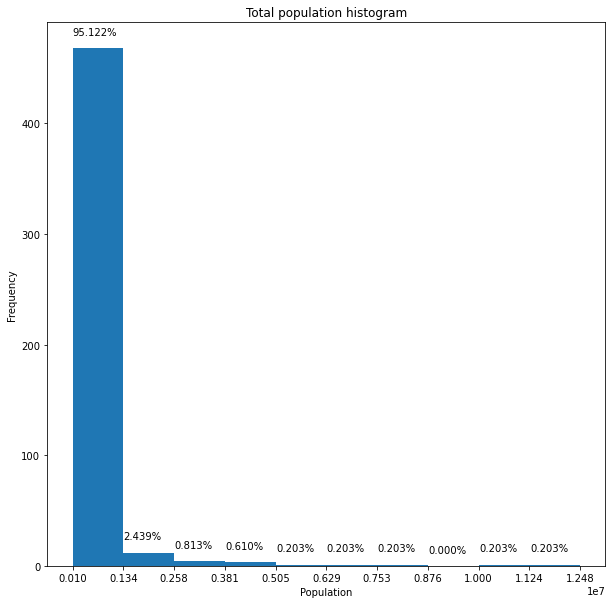

In [34]:
# Bin edges distribution and frequencies for the population histogram with 10 bins
hist, binEdges = np.histogram(df["population_total"])
# Histogram showing the frequency distribution of populations
plt.figure(figsize = (10, 10))
df["population_total"].plot(kind = "hist")
# Set the xticks according to the binEdges
plt.xticks(binEdges)
# Set the title
plt.title("Total population histogram")
# Set the x label
plt.xlabel("Population")
# Print the frequency distribution
for i, y in enumerate(hist):
    plt.text(0.010e7 + 0.124e7 * i, y + 12, "%.3f%%"%(y / 492 * 100))
print(hist * 100 / 492)
# plt.savefig("total-population-histogram.jpg")
plt.show()

This suggests that almost all of the 492 cities (95.12%) have a population between 1 lakh to 13.4 lakhs and a very small proportion (0.406%) has a population between 1 crore to 1.25 crores.

# K-Means Model Training for Clustering

In [35]:
# Import the necessary class for runnning the k-means algorithm
from sklearn.cluster import KMeans
# Import the StandardScaler class from sklearn.preprocessing to do some standard scaling
from sklearn.preprocessing import StandardScaler

In [36]:
# Declare the kmeans object
kmeans = KMeans(init = "k-means++", n_clusters = 2, n_init = 12)
# Run Standard Scaler on our final dataset, removing the string column (state_name)
X = StandardScaler().fit_transform(df.drop("state_name", axis = 1, inplace = False))
# Train it with our dataframe as the feature matrix (without considering the state names' column)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=12)

In [37]:
# Now add the cluster labels corresponding to the city names
df["label"] = kmeans.labels_

In [38]:
# Declare a list of colours to be used to plot the cities belonging to different labels on the map
colours = ["red", "blue"]
# Initialize the map
india = folium.Map(location = [20.5937, 78.9629], zoom_start = 4.4)
# Now represent the cities on a map with different colours depending upon the labels
for city, state, lat, long, label in zip(df.index, df["state_name"], df["lat"], df["long"], df["label"]):
#     print(city, state, lat, long, label)
    folium.CircleMarker(
        [lat, long],
        radius = 3,
        color = colours[label],
        opacity = 0.6,
        popup = "<h3 style=\"color: " + colours[label] + "\">" + city + "</h3><div style=\"color: black\">" + state + "</div>"
    ).add_to(india)

# Display the map
india

<blockquote style="background: skyblue; color: yellow; font-size: 2rem;">
    Map <b>( 2 )</b>
</blockquote>

# Post-Model-Training Data Analysis

In [39]:
# Let's overview the average properties of each label
dfLabel = df.drop(["state_name", "state_code"], axis = 1).groupby("label").mean()
dfLabel

,population_total,0-6_population_total,literates_total,sex_ratio,child_sex_ratio,effective_literacy_rate_total,total_graduates,literacy_ratio,literacy_rate_ratio,graduates_ratio,lat,long,Food/Lodging/Luxury,Shops/Market/Services,Recreational/Sports/Art,Nature/Historic/Tourism,Public/Transport,TOTAL
label,,,,,,,,,,,,,,,,,,
0,1.205678e+06,122569.529412,953519.686275,919.431373,912.676471,88.435196,194953.784314,843.333333,915.176471,783.245098,21.356199,79.098321,52.784314,16.039216,4.264706,3.882353,1.941176,78.911765
1,2.508685e+05,27436.897436,187996.130769,933.202564,899.651282,84.262897,32664.961538,825.702564,880.512821,676.648718,22.748415,79.911412,4.094872,1.646154,0.266667,0.494872,1.858974,8.361538


<b>The colors Red and Blue are being used respectively for the developed cities and the underdeveloped cities, clustered AT THE TIME OF THE FINAL RUN OF THIS NOTEBOOK DURING PRODUCTION. Therefore, during any further run of this notebook (and hence running the KMeans clusterer) the results might be different.<br/>
Also, every time I mention the word UNDERDEVELOPED, it stands for NOT WELL DEVELOPED OR LESS DEVELOPED CITIES.</b>

So the above analysis informs us a few very important things about the Indian cities (which may work out for the cities in any other country as well):
<ol>
    <li>The Red cities have almost 5 times the average population as that of the Blue ones.</li>
    <li>The average population of kids between 0 to 6 years of age is almost 5 times in case of the Red ones as that in the case of the Blue ones.</li>
    <li>The Red cities have a very large population average of literates (more than 5 times as that of the Blue ones).</li>
    <li>The average sex ratios, child sex ratios, literacy rates, literacy rate ratios, literacy ratios, graduates ratios, geographical coordinates and public/transport facilities of both the classes of cities are almost similar.</li>
    <li>The average number of graduates in the Red cities is around 6 times that of the Blue cities.</li>
    <li>In most of the classes of facilities, the Red cities are greatly ahead of the Blue ones. In fact, the Red cities even win the competition of the average all-round facilities provided.</li>
</ol>

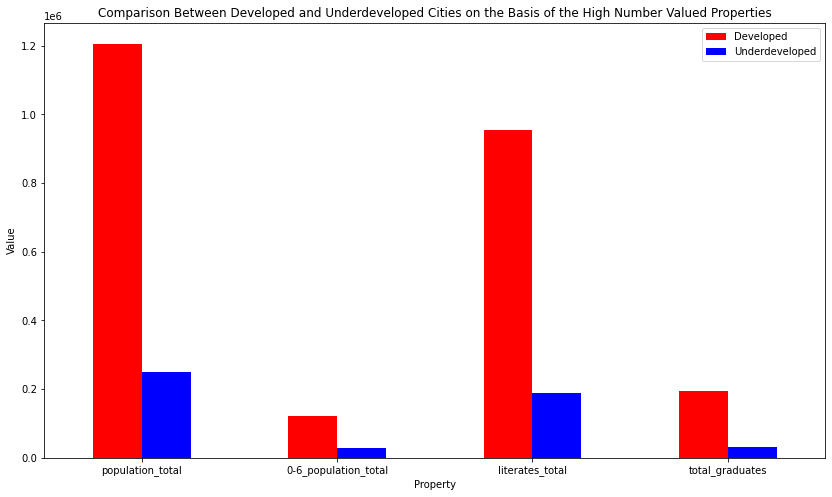

In [40]:
# Bar plot for the high number-based values
dfLabel[["population_total", "0-6_population_total", "literates_total", "total_graduates"]].transpose().plot(kind = "bar", color = ["red", "blue"], figsize = (14, 8), rot = 0)
# Legend
plt.legend(["Developed", "Underdeveloped"])
# Title
plt.title("Comparison Between Developed and Underdeveloped Cities on the Basis of the High Number Valued Properties")
# Labels
plt.xlabel("Property")
plt.ylabel("Value")

plt.show()

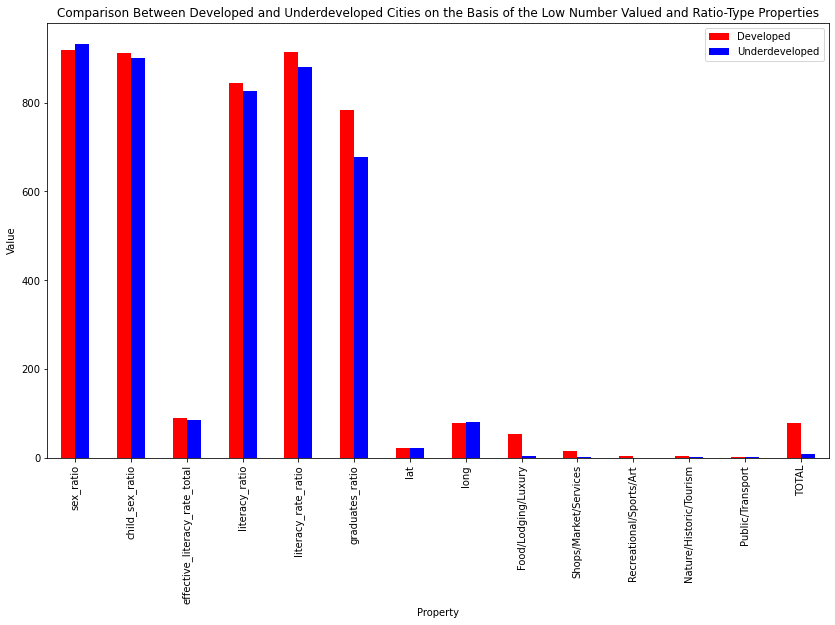

In [41]:
# Bar plot for the low number-based values and ratios
dfLabel[[col for col in dfLabel.columns if col not in ["population_total", "0-6_population_total", "literates_total", "total_graduates"]]].transpose().plot(kind = "bar", color = ["red", "blue"], figsize = (14, 8))
# Legend
plt.legend(["Developed", "Underdeveloped"])
# Title
plt.title("Comparison Between Developed and Underdeveloped Cities on the Basis of the Low Number Valued and Ratio-Type Properties")
# Labels
plt.xlabel("Property")
plt.ylabel("Value")

plt.show()

Therefore, this analysis suggests us that the two classes of cities, Blue and Red, are respectively the less developed or underdeveloped ones and the developed ones.
Also, the developed cities have very high overall population and a higher population of the next generation (youngsters) as compared with the underdeveloped ones. Moreover, which is also quite obvious, the developed cities have higher number of literates and graduates and provide a lot more facilities to their citizens.

Therefore we can say that the status of living is, again quite obviously, better in the developed cities and has therefore expanded the urbanisation of such places. So more business and industry can flourish in such cities. Also, providing proper educational facilities, healthcare and public services to the underdeveloped or less developed ones can improve their status, thus paving way for an even larger population of people to gain access to other facilities and help more businesses to make their mark.